In [7]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
import pandas as pd
from wordcloud import WordCloud
import gensim

ImportError: No module named PIL

# Load data_vraag from file

In [3]:
import pickle
data_vraag = pickle.load(open('preprocessedData.pkl', 'r'))

In [4]:
data_ppl = data_vraag[data_vraag['individu of groep']=='mijzelf']
data_org = data_vraag[data_vraag['individu of groep']!='mijzelf']

In [5]:
vraagTokens = data_vraag['SentToks'].tolist()

In [6]:
dic = gensim.corpora.Dictionary(vraagTokens)
corpus = [dic.doc2bow(text) for text in vraagTokens]

In [7]:
gensim.corpora.MmCorpus.serialize('VraagTextCorpus.mm', corpus)
mm = gensim.corpora.MmCorpus('VraagTextCorpus.mm')

In [8]:
def inRange(age, targetAge, delta):
    return (targetAge-delta)<=age and age<=(targetAge+delta)

def getPplCirca(targetAge, delta):
    return data_ppl[data_ppl['Leeftijd'].apply(lambda age: inRange(age,targetAge, delta))]

In [9]:
nTopics = 10
lda = gensim.models.ldamodel.LdaModel(corpus=mm, id2word=dic, num_topics=nTopics, update_every=1, chunksize=1000, passes=10)

In [10]:
topicsByAge = np.zeros((data_ppl['Leeftijd'].max()+1, nTopics))
deltaAge = 5

for age in arange(data_ppl['Leeftijd'].max()+1):
    dataGroup = getPplCirca(age,deltaAge)
    groupTokens = dataGroup['SentToks'].tolist()
    
    for qTokens in groupTokens:
        for topic,weight in lda.get_document_topics(dic.doc2bow(qTokens), minimum_probability=0):
            topicsByAge[age,topic] += weight / len(groupTokens)

In [12]:
topicWeightedWords = lda.show_topics(nTopics, num_words=10, formatted=False)

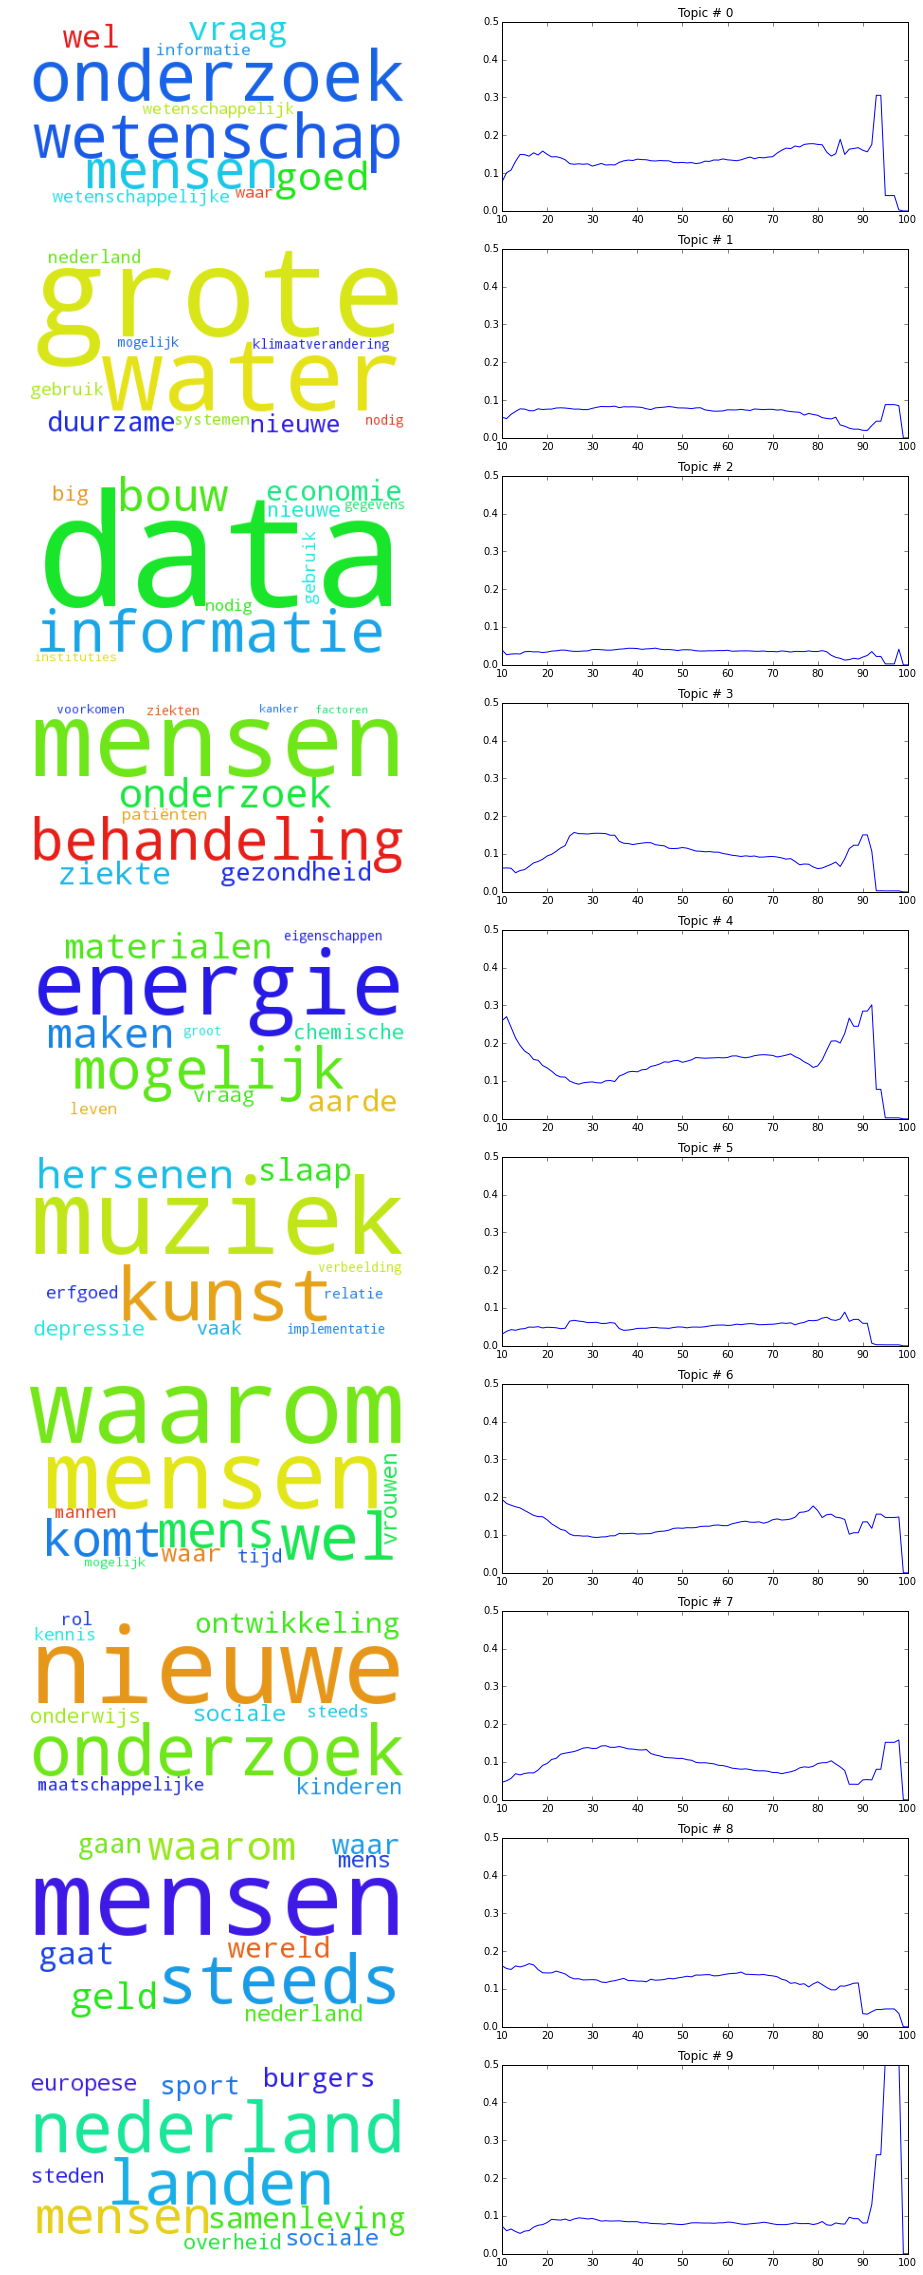

In [13]:
figure(figsize=(16,40))
for idx,topic in enumerate(topicWeightedWords):
    wc = WordCloud(background_color="white", relative_scaling=0.9)
    img = wc.generate_from_frequencies([ (word, weight) for weight,word in topic ])
    subplot(nTopics,2,2*idx+1)
    imshow(img)
    axis('off')
    
    subplot(nTopics,2,2*idx+2)
    plot(topicsByAge[:,idx])
    axis([10, 100, 0, 0.5])
    title('Topic #%2d'%(idx))
    
